In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from spacy import displacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
data = pd.read_csv(next(iter(uploaded)))

Saving Language Detection.csv to Language Detection.csv


In [ ]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [ ]:
x = np.array(data["Text"])
y = np.array(data["Language"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
model.score(X_test,y_test)

0.977725674091442

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
data['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [ ]:
X=data.iloc[:,0]
y=data.iloc[:,-1]

In [ ]:
X,y

(0         Nature, in the broadest sense, is the natural...
 1        "Nature" can refer to the phenomena of the phy...
 2        The study of nature is a large, if not the onl...
 3        Although humans are part of nature, human acti...
 4        [1] The word nature is borrowed from the Old F...
                                ...                        
 10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
 10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
 10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
 10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
 10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
 Name: Text, Length: 10337, dtype: object,
 0        English
 1        English
 2        English
 3        English
 4        English
           ...   
 10332    Kannada
 10333    Kannada
 10334    Kannada
 10335    Kannada
 10336    Kannada
 Name: Language, Length: 10337, dtype: object)

##Text Cleaning and Visualization

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def word_token(sentence,flage=0):
    token=word_tokenize(sentence)
    if flage==1:
        return token
    return '  ||  '.join(token)
def remove_stop_word(sentence):
    stop_words = stopwords.words('english')
    punct = list(punctuation)
    token=word_token(sentence,1)
    words=[]
    for word in token:
        if  word not in punct and not word.isdigit() :
            words.append(word.lower())
    return words
def pos(sentence):
    nlp = spacy.load('en_core_web_sm')
    for w , m in nltk.pos_tag(word_token(sentence,1)):
           print(f'word : ({w}), type : ({m}) , means : ({spacy.explain(m)})')
def Stemming(sentence):
    snowball = SnowballStemmer(language='english')
    for word in word_token(sentence,1):
        print(word,"--->",snowball.stem(word))
'''def Lemmatizer(sentence):
    lemmatizer = WordNetLemmatizer()
    for word in word_token(sentence,1):
        print(word,"--->",lemmatizer.lemmatize(word))
    '''
def NER_word(sentence):
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    if doc.ents:
        for token in doc.ents:
            print(token.text , ' : ' ,  token.label_ , ' : ' , str(spacy.explain(token.label_)))
    else:
        print('No named entities found.')
def Visualization(sentence):
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 80})
    displacy.render(doc, style='ent', jupyter=True)

In [ ]:
for i in np.random.randint(0,10337,10):
    print(word_token(X[i]))
    print('*'*40)

hvad  ||  så  ||  ?
****************************************
Estaré  ||  contigo  ||  en  ||  un  ||  minuto  ||  .
****************************************
Vikipedilerin  ||  toplamda  ||  55.721.345  ||  maddesi  ||  vardır  ||  .
****************************************
è  ||  molto  ||  tempo  ||  che  ||  non  ||  ci  ||  si  ||  vede  ||  .
****************************************
विद्यार्थी  ||  आंद्रे  ||  सिफोलिली  ||  ने  ||  तर्क  ||  दिया  ||  कि  ||  विकी  ||  सॉफ्टवेयर  ||  में  ||  भाग  ||  लेने  ||  की  ||  कम  ||  लेन  ||  देन  ||  लागत  ||  सहयोगी  ||  विकास  ||  के  ||  लिए  ||  एक  ||  उत्प्रेरक  ||  का  ||  काम  ||  करती  ||  है  ||  और  ||  यह  ||  कि  ||  एक  ||  ``  ||  निर्माणात्मक  ||  रचना  ||  ''  ||  दृष्टिकोण  ||  भागीदारी  ||  को  ||  प्रोत्साहित  ||  करता  ||  है।  ||  [  ||  89  ||  ]  ||  ओक्स्फोर्ड  ||  इंटरनेट  ||  संस्थान  ||  और  ||  हार्वर्ड  ||  लॉ  ||  स्कूल्स  ||  बर्क्मेन  ||  सेंटर  ||  फॉर  ||  इंटरनेट  ||  एंड  ||  सोसाइटी  ||  के  ||  जोना

In [ ]:
for i in np.random.randint(0,10337,10):
    print('before')
    print(word_token(X[i]))
    print('after')
    print(remove_stop_word(X[i]))
    print('*'*40)

before
per  ||  rispondere  ||  a  ||  una  ||  singola  ||  domanda  ||  sul  ||  test  ||  o  ||  l'uomo  ||  ottuso  ||  ha  ||  avuto  ||  difficoltà  ||  a  ||  capire  ||  anche  ||  le  ||  istruzioni  ||  di  ||  base  ||  ora  ||  supponiamo  ||  che  ||  nella  ||  tua  ||  situazione  ||  nella  ||  vita  ||  quotidiana  ||  il  ||  tuo  ||  ragazzo  ||  o  ||  la  ||  tua  ||  ragazza  ||  sia  ||  arrabbiato  ||  con  ||  te  ||  e  ||  non  ||  sai  ||  perché  ||  così  ||  puoi  ||  .
after
['per', 'rispondere', 'a', 'una', 'singola', 'domanda', 'sul', 'test', 'o', "l'uomo", 'ottuso', 'ha', 'avuto', 'difficoltà', 'a', 'capire', 'anche', 'le', 'istruzioni', 'di', 'base', 'ora', 'supponiamo', 'che', 'nella', 'tua', 'situazione', 'nella', 'vita', 'quotidiana', 'il', 'tuo', 'ragazzo', 'o', 'la', 'tua', 'ragazza', 'sia', 'arrabbiato', 'con', 'te', 'e', 'non', 'sai', 'perché', 'così', 'puoi']
****************************************
before
Bland  ||  annat  ||  kunde  ||  de 

In [ ]:
X_clean=[]
for sentence in X:
    X_clean.append(' '.join(remove_stop_word(sentence)))
pd.DataFrame(np.array(X_clean),columns=['Text'])

,Text
0,nature in the broadest sense is the natural ph...
1,`` nature '' can refer to the phenomena of the...
2,the study of nature is a large if not the only...
3,although humans are part of nature human activ...
4,the word nature is borrowed from the old frenc...
...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [ ]:
X_clean

['nature in the broadest sense is the natural physical material world or universe',
 "`` nature '' can refer to the phenomena of the physical world and also to life in general",
 'the study of nature is a large if not the only part of science',
 'although humans are part of nature human activity is often understood as a separate category from other natural phenomena',
 "the word nature is borrowed from the old french nature and is derived from the latin word natura or `` essential qualities innate disposition '' and in ancient times literally meant `` birth ''",
 'in ancient philosophy natura is mostly used as the latin translation of the greek word physis φύσις which originally related to the intrinsic characteristics that plants animals and other features of the world develop of their own accord',
 'the concept of nature as a whole the physical universe is one of several expansions of the original notion it began with certain core applications of the word φύσις by pre-socratic philos

In [ ]:
for i in np.random.randint(0,10337,5):
    pos(X_clean[i])
    print('*'*40)

word : (the), type : (DT) , means : (determiner)
word : (development), type : (NN) , means : (noun, singular or mass)
word : (of), type : (IN) , means : (conjunction, subordinating or preposition)
word : (technology), type : (NN) , means : (noun, singular or mass)
word : (by), type : (IN) , means : (conjunction, subordinating or preposition)
word : (the), type : (DT) , means : (determiner)
word : (human), type : (JJ) , means : (adjective (English), other noun-modifier (Chinese))
word : (race), type : (NN) , means : (noun, singular or mass)
word : (has), type : (VBZ) , means : (verb, 3rd person singular present)
word : (allowed), type : (VBN) , means : (verb, past participle)
word : (the), type : (DT) , means : (determiner)
word : (greater), type : (JJR) , means : (adjective, comparative)
word : (exploitation), type : (NN) , means : (noun, singular or mass)
word : (of), type : (IN) , means : (conjunction, subordinating or preposition)
word : (natural), type : (JJ) , means : (adjective (

In [ ]:
for i in np.random.randint(0,10337,10):
    NER_word(X_clean[i])
    print('*'*40)

редакторов образуют движение  :  PERSON  :  People, including fictional
****************************************
china  :  GPE  :  Countries, cities, states
pakistan  :  GPE  :  Countries, cities, states
****************************************
أنهم نسوا ما يجب عليهم فعله  :  PERSON  :  People, including fictional
****************************************
mermelada de rubí  :  PERSON  :  People, including fictional
un  :  ORG  :  Companies, agencies, institutions, etc.
gran mordisco esto  :  PERSON  :  People, including fictional
tan bien  :  PERSON  :  People, including fictional
pan hecho de oro  :  PERSON  :  People, including fictional
el más fino también  :  ORG  :  Companies, agencies, institutions, etc.
pan de plata  :  ORG  :  Companies, agencies, institutions, etc.
****************************************
No named entities found.
****************************************
No named entities found.
****************************************
ich weiß ich verstehe  :  PERSON  :  People

In [ ]:
for i in np.random.randint(0,10337,10):
    Visualization(X_clean[i])
    print('*'*100)

****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


In [ ]:
X_clean

NameError: name 'X_clean' is not defined

TFidf Vectoirzer


In [ ]:
tfid=TfidfVectorizer()
PipelineModel = Pipeline([('tfid',tfid)])
X_input=PipelineModel.fit_transform(X_clean)
X_input = pd.DataFrame.sparse.from_spmatrix(X_input)
X_input

,0,1,2,3,4,5,6,7,8,9,...,39561,39562,39563,39564,39565,39566,39567,39568,39569,39570
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create a pipeline with TF-IDF Vectorizer directly
PipelineModel = Pipeline([('tfid', TfidfVectorizer())])

# Fit-transform the pipeline on cleaned text data and convert to DataFrame
X_input = pd.DataFrame.sparse.from_spmatrix(PipelineModel.fit_transform(X_clean))

# Display the TF-IDF matrix
print(X_input)

       0      1      2      3      4      5      6      7      8      9      \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10332    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10333    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10334    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10335    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10336    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  39561  39562  39563  39564  39565  3956

In [ ]:
for feature in tfid.get_feature_names_out():
    print(feature,end=' & ')

NameError: name 'tfid' is not defined

In [ ]:
pd.DataFrame(tfid.get_feature_names_out(),columns=['Feature Names'])

,Feature Names
0,00
1,000
2,000க
3,001
4,001097666virtual
...,...
39566,ൽപ
39567,ൽവർ
39568,ൾക
39569,ൾപ


In [ ]:
dic={}
i=0
for word in pd.unique(y):
    dic[word]=i
    i+=1
def get_code(N):
    for x,y in dic.items():
        if y==N:
            return x
dic

{'English': 0,
 'Malayalam': 1,
 'Hindi': 2,
 'Tamil': 3,
 'Portugeese': 4,
 'French': 5,
 'Dutch': 6,
 'Spanish': 7,
 'Greek': 8,
 'Russian': 9,
 'Danish': 10,
 'Italian': 11,
 'Turkish': 12,
 'Sweedish': 13,
 'Arabic': 14,
 'German': 15,
 'Kannada': 16}

In [ ]:
label=[]
for word in y:
    label.append(dic[word])
label=pd.DataFrame(label,columns=['langauge'])
label

,langauge
0,0
1,0
2,0
3,0
4,0
...,...
10332,16
10333,16
10334,16
10335,16


#Data Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_input, label, test_size=0.1, random_state=33)
print('X train shape is :',X_train.shape)
print('X test shape is :',X_test.shape)
print('y test shape is :',y_train.shape)
print('y test shape is :',y_test.shape)

X train shape is : (9303, 39571)
X test shape is : (1034, 39571)
y test shape is : (9303, 1)
y test shape is : (1034, 1)


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(17, activation=tf.nn.softmax)
                                   ])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train, y_train, epochs=5)

Epoch 1/5
291/291 [==============================] - 119s 402ms/step - loss: 0.5807 - accuracy: 0.8485
Epoch 2/5
291/291 [==============================] - 120s 413ms/step - loss: 0.0258 - accuracy: 0.9931
Epoch 3/5
291/291 [==============================] - 117s 402ms/step - loss: 0.0125 - accuracy: 0.9966
Epoch 4/5
291/291 [==============================] - 117s 403ms/step - loss: 0.0096 - accuracy: 0.9975
Epoch 5/5
291/291 [==============================] - 116s 398ms/step - loss: 0.0098 - accuracy: 0.9972


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 39571)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               20260864  
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 17)                2193      
                                                                 
Total params: 20427281 (77.92 MB)
Trainable params: 20427281 (77.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


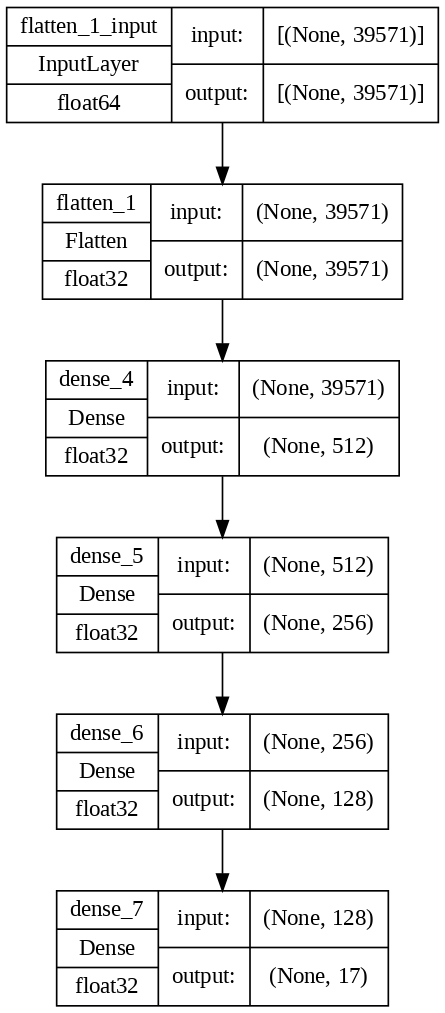

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [ ]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 2s 42ms/step - loss: 0.1370 - accuracy: 0.9671


[0.13696685433387756, 0.967117965221405]

In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy
0,0.580700,0.848543
1,0.025835,0.993120
2,0.012478,0.996560
3,0.009610,0.997528
4,0.009827,0.997205


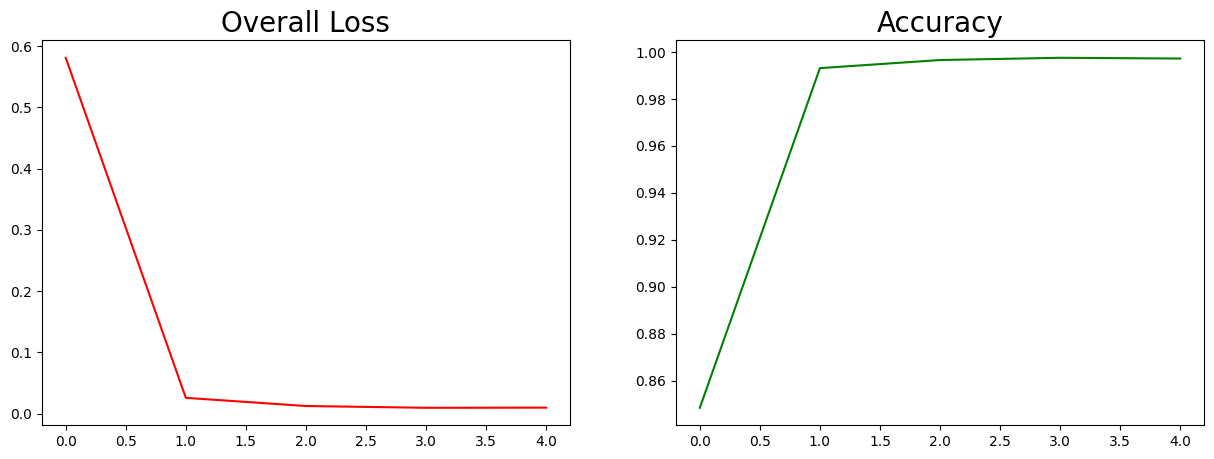

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Overall Loss',fontsize=20)
plt.plot(hist_['loss'],c='r',label='Overall Loss')
plt.subplot(1,2,2)
plt.title('Accuracy',fontsize=20)
plt.plot(hist_['accuracy'],c='g',label='Accuracy')

Epoch 1/10
291/291 [==============================] - 125s 425ms/step - loss: 0.0109 - accuracy: 0.9970
Epoch 2/10
291/291 [==============================] - 118s 405ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 3/10
291/291 [==============================] - 119s 410ms/step - loss: 0.0073 - accuracy: 0.9976
Epoch 4/10
291/291 [==============================] - 120s 411ms/step - loss: 0.0066 - accuracy: 0.9976
Epoch 5/10
291/291 [==============================] - 126s 433ms/step - loss: 0.0064 - accuracy: 0.9976
Epoch 6/10
291/291 [==============================] - 118s 406ms/step - loss: 0.0061 - accuracy: 0.9979
Epoch 7/10
291/291 [==============================] - 119s 410ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 8/10
291/291 [==============================] - 119s 409ms/step - loss: 0.0058 - accuracy: 0.9977
Epoch 9/10
291/291 [==============================] - 122s 417ms/step - loss: 0.0060 - accuracy: 0.9976
Epoch 10/10
291/291 [==============================] - 118s 405m

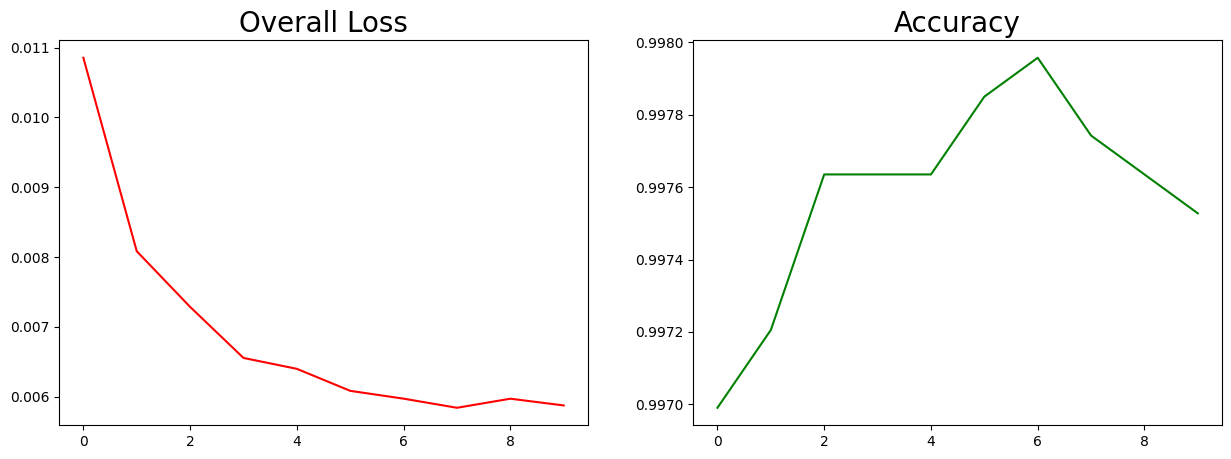

In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# hist=model.fit(X_train, y_train, epochs=10)
# model.summary()
# tf.keras.utils.plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)
# model.evaluate(X_test,y_test)
# hist_=pd.DataFrame(hist.history)
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.title('Overall Loss',fontsize=20)
# plt.plot(hist_['loss'],c='r',label='Overall Loss')
# plt.subplot(1,2,2)
# plt.title('Accuracy',fontsize=20)
# plt.plot(hist_['accuracy'],c='g',label='Accuracy')


In [ ]:
prediction=model.predict(X_test)

33/33 [==============================] - 2s 48ms/step


In [ ]:
y_pred=[]
pred=[]
for row in prediction:
    N=np.argmax(row)
    y_pred.append(N)
    pred.append(get_code(N))
pd.DataFrame(pred,columns=['Predictions'])

,Predictions
0,Turkish
1,Tamil
2,Turkish
3,Russian
4,Russian
...,...
1029,Portugeese
1030,English
1031,Tamil
1032,English


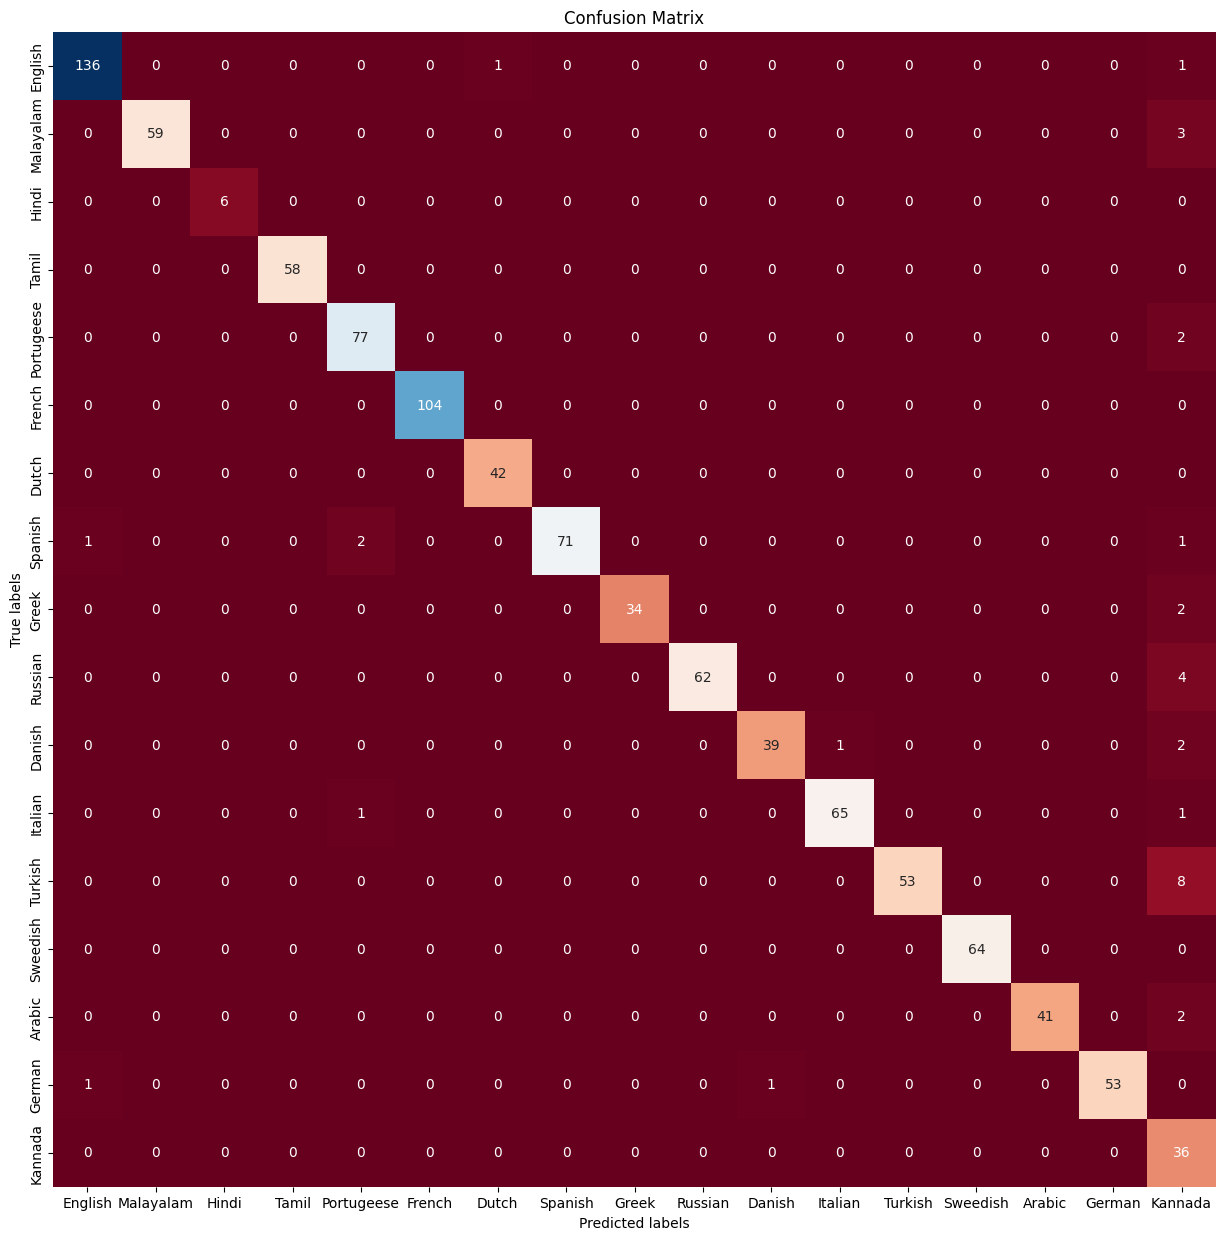

array([[136,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   3],
       [  0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,  58,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2],
       [  0,   0,   0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  42,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   0,   0,   0,   2,   0,   0,  71,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34,   0,   0,   0,   0,
          0,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  62,   0,   0,   0,
         

In [ ]:
plt.figure(figsize=(15,15))
ax= plt.subplot()
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(dic.keys())
ax.yaxis.set_ticklabels(dic.keys())
plt.show()
CM

In [ ]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       1.00      0.95      0.98        62
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        58
           4       0.96      0.97      0.97        79
           5       1.00      1.00      1.00       104
           6       0.98      1.00      0.99        42
           7       1.00      0.95      0.97        75
           8       1.00      0.94      0.97        36
           9       1.00      0.94      0.97        66
          10       0.97      0.93      0.95        42
          11       0.98      0.97      0.98        67
          12       1.00      0.87      0.93        61
          13       1.00      1.00      1.00        64
          14       1.00      0.95      0.98        43
          15       1.00      0.96      0.98        55
          16       0.58      1.00      0.73        36

In [ ]:
def prediction_func(sentence):
    sent=' '.join(remove_stop_word(sentence))
    sent=PipelineModel.transform([sent])
    sent=pd.DataFrame.sparse.from_spmatrix(sent)
    return get_code(np.argmax(model.predict(sent)))

In [ ]:
prediction_func("مرحبا كيف حالك؟")

1/1 [==============================] - 0s 36ms/step


'Arabic'

In [ ]:
k = prediction_func('Ik moet met je praten')
k

1/1 [==============================] - 0s 28ms/step


'Dutch'

In [ ]:
model_path = '/content/Language.model'
model.save(model_path)
print(f"Model saved to {model_path}")

# Download the model file to your PC
files.download(model_path)

Model saved to /content/Language.model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=0e0141fde3e4885925c9faa860f41c9f3fb629cabb615a8dae4ec7436eec250a
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
from googletrans import Translator

def translate_to_english(text):
    translator = Translator()
    translation = translator.translate(text, dest='en')
    return translation.text

# Example usage
text = "Ik moet met je praten"
translated_text = translate_to_english(text)
print(f"Original text: {text}")
print(f"Translated text: {translated_text}")


Original text: Ik moet met je praten
Translated text: I need to talk to you


In [ ]:
model
model.save('/kaggle/working/Language.model')


In [ ]:
savedmodel=keras.models.load_model('/kaggle/working/Language.model')

In [ ]:
model_path = '/content/Language.model'
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to /content/Language.model


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('Language.model')

In [ ]:
def prediction_func(sentence):
    sent=' '.join(remove_stop_word(sentence))
    sent=PipelineModel.transform([sent])
    sent=pd.DataFrame.sparse.from_spmatrix(sent)
    return get_code(np.argmax(loaded_model.predict(sent)))

In [ ]:
k = prediction_func("مرحبا كيف حالك؟")

1/1 [==============================] - 0s 125ms/step


'Arabic'

In [ ]:
translate_to_english("مرحبا كيف حالك؟")

'Hello, how are you?'